In [102]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [67]:
Train=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\SVM\\SalaryData_Train(1).csv")

In [68]:
Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [69]:
Test=pd.read_csv("C:\\Users\\lenovo\OneDrive\\data science\\assignment\\SVM\\SalaryData_Test(1).csv")
Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [70]:
# EDA ON Training Set

In [71]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [72]:
Train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [73]:
Train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [74]:
Train.duplicated().sum()

3258

In [75]:
Train.drop_duplicates()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [76]:
Train_columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [77]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
for i in Train_columns:
    Train[i]=label_enc.fit_transform(Train[i])
    Test[i]=label_enc.fit_transform(Test[i])
    

In [78]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [79]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [80]:
Train.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
count,30161.000000,30161.00000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,2.19933,10.33361,10.121316,2.580087,5.959849,1.418322,3.678592,0.675707,1092.044064,88.302311,40.931269,35.413481
std,13.134830,0.95394,3.81226,2.550037,1.498018,4.029633,1.601361,0.834721,0.468118,7406.466611,404.121321,11.980182,5.956430
min,17.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.00000,9.00000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,2.00000,11.00000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,47.000000,2.00000,12.00000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,6.00000,15.00000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000


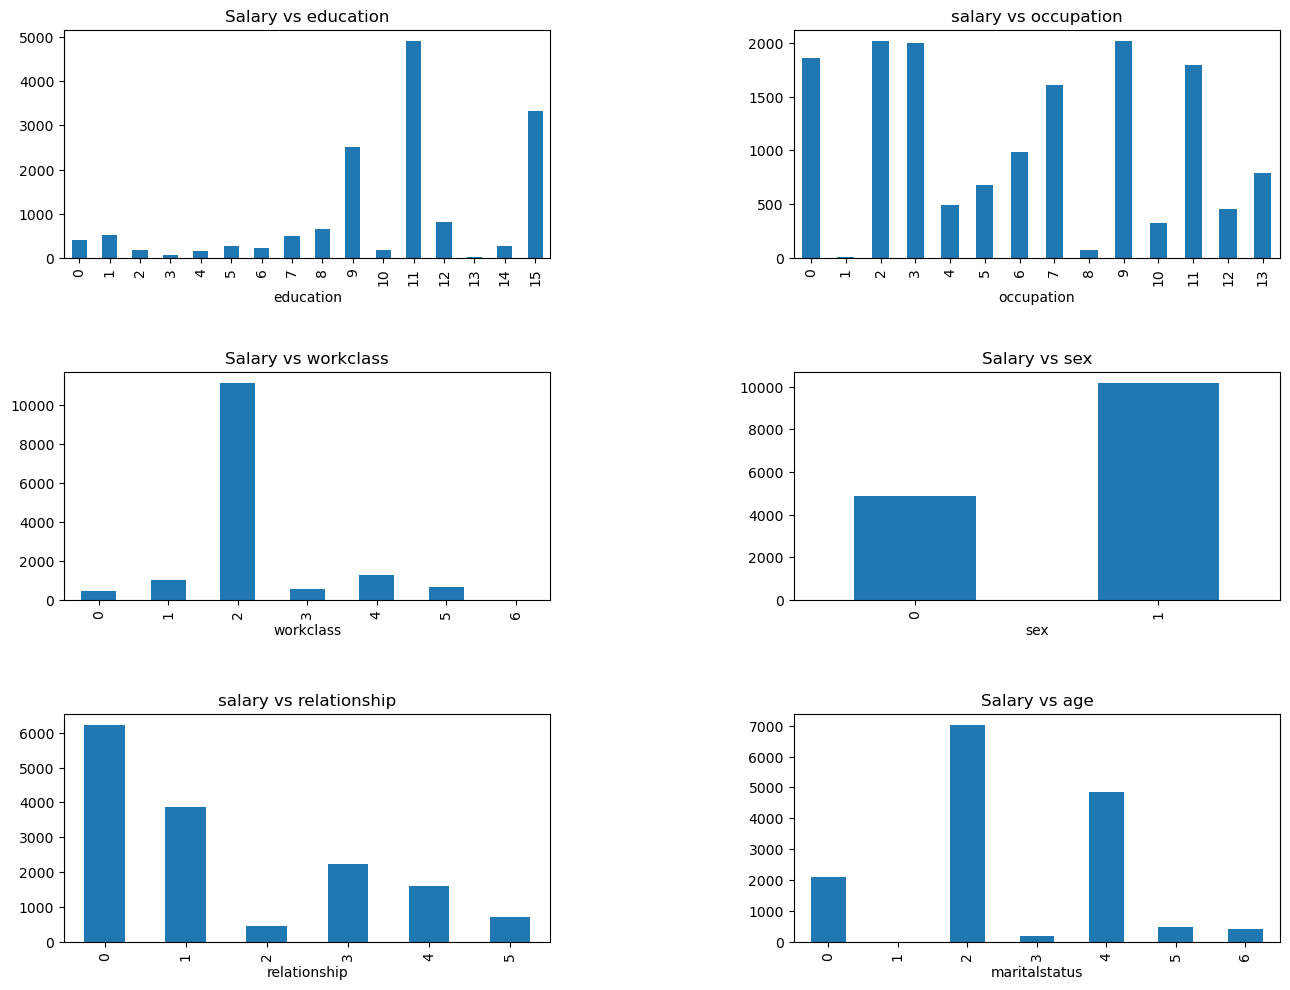

In [81]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=2,top=2, wspace=0.5,hspace=0.5)
plt.subplot(3,2,1)
pd.crosstab(Train['Salary'],Train['education']).mean().plot(kind='bar')
plt.title('Salary vs education')
plt.subplot(3,2,2)
pd.crosstab(Train['Salary'],Train['occupation']).mean().plot(kind='bar')
plt.title('salary vs occupation')
plt.subplot(3,2,3)
pd.crosstab(Train['Salary'],Train['workclass']).mean().plot(kind='bar')
plt.title('Salary vs workclass')
plt.subplot(3,2,4)
pd.crosstab(Train['Salary'],Train['sex']).mean().plot(kind='bar')
plt.title('Salary vs sex')
plt.subplot(3,2,5)
pd.crosstab(Train['Salary'],Train['relationship']).mean().plot(kind='bar')
plt.title('salary vs relationship')
plt.subplot(3,2,6)
pd.crosstab(Train['Salary'],Train['maritalstatus']).mean().plot(kind='bar')
plt.title('Salary vs age')
plt.show()

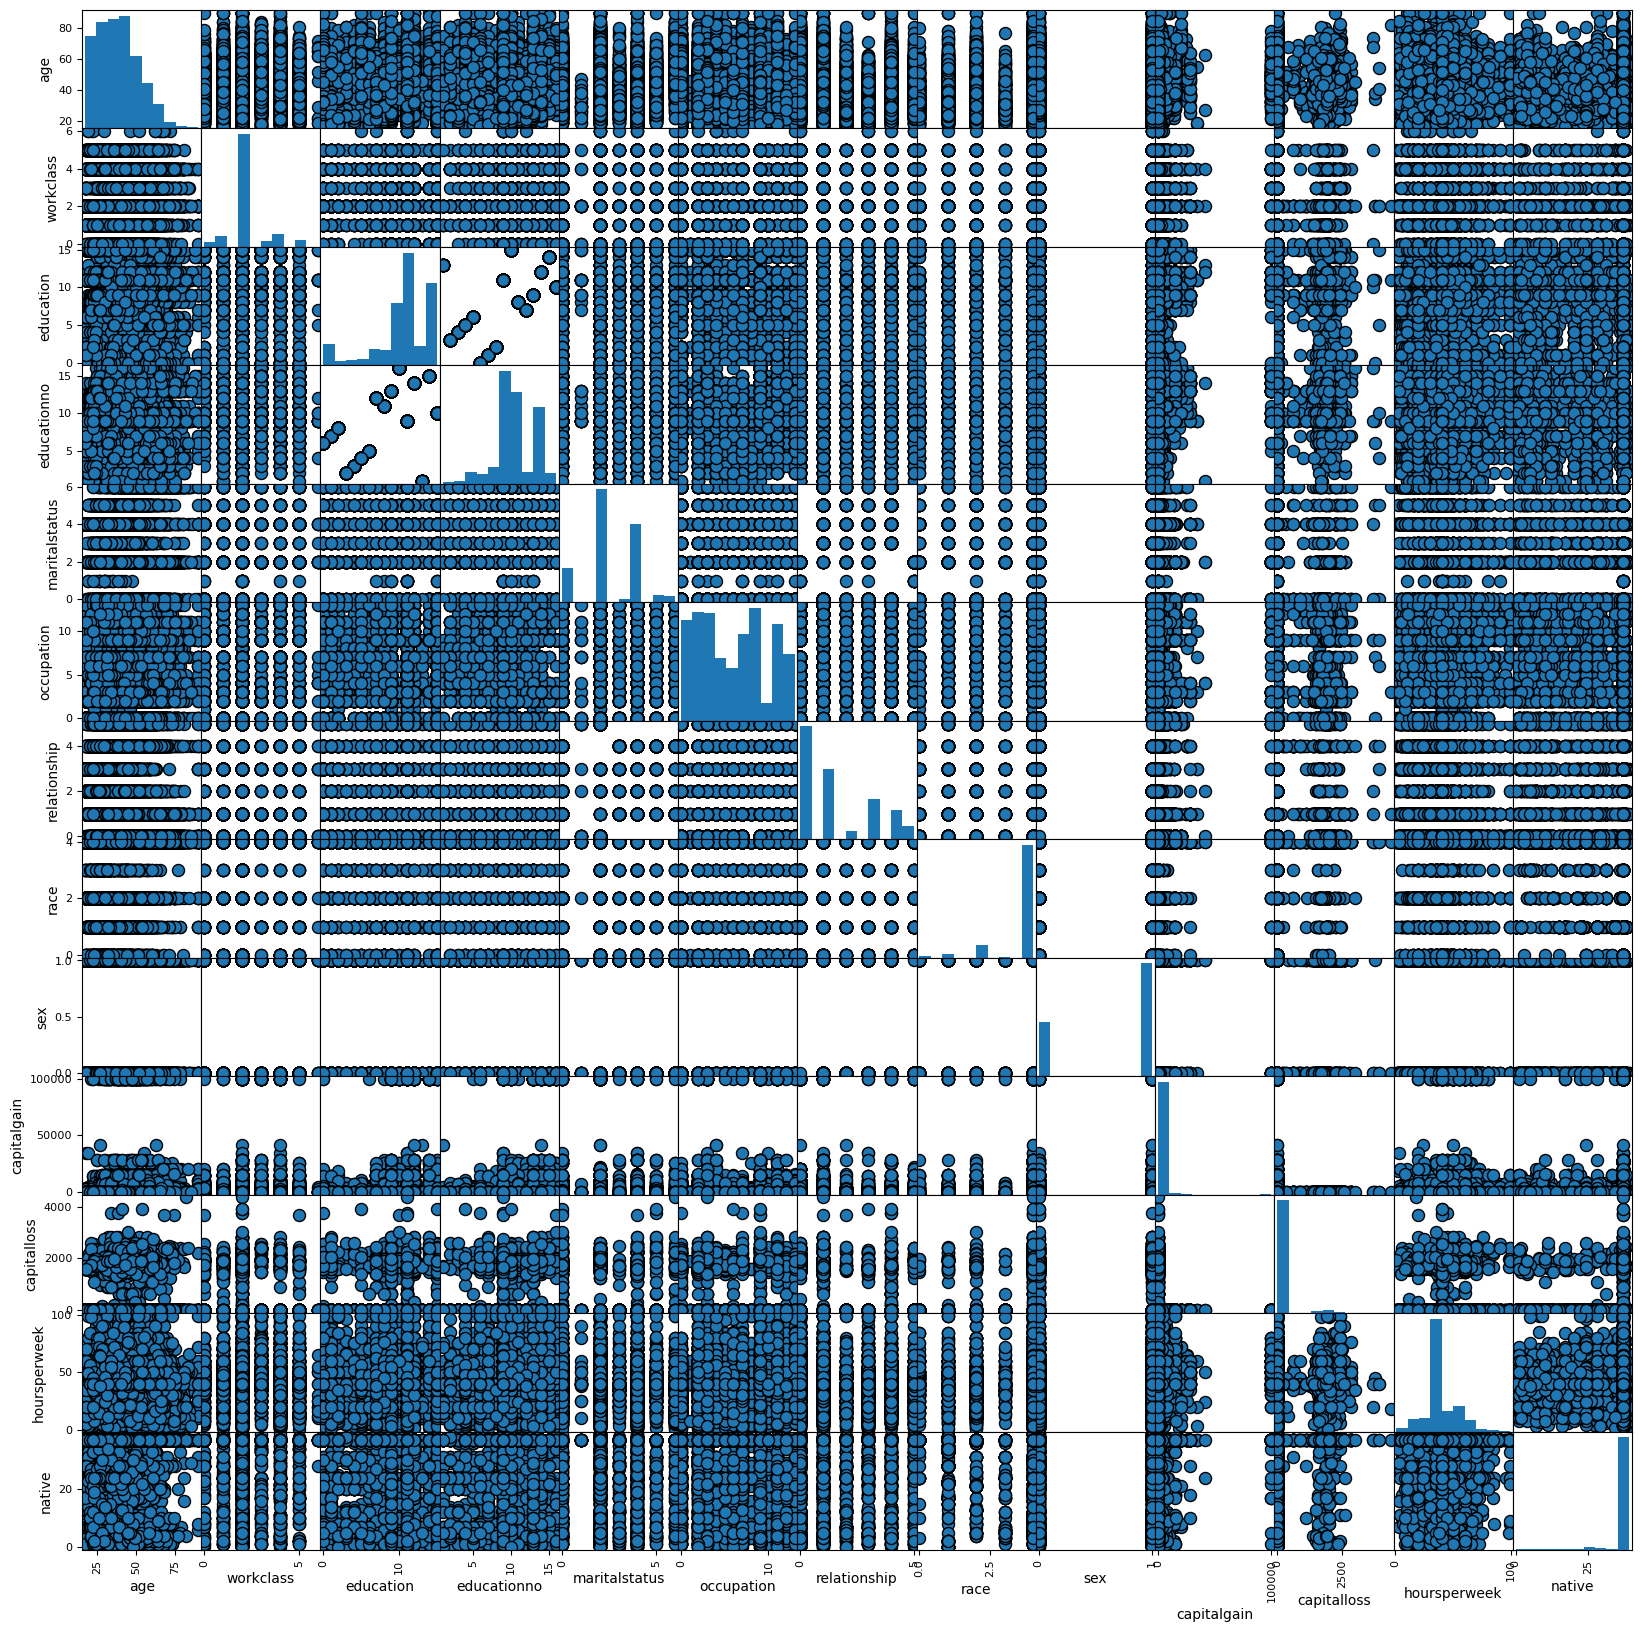

In [82]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(Train,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

In [83]:
# outlier detection

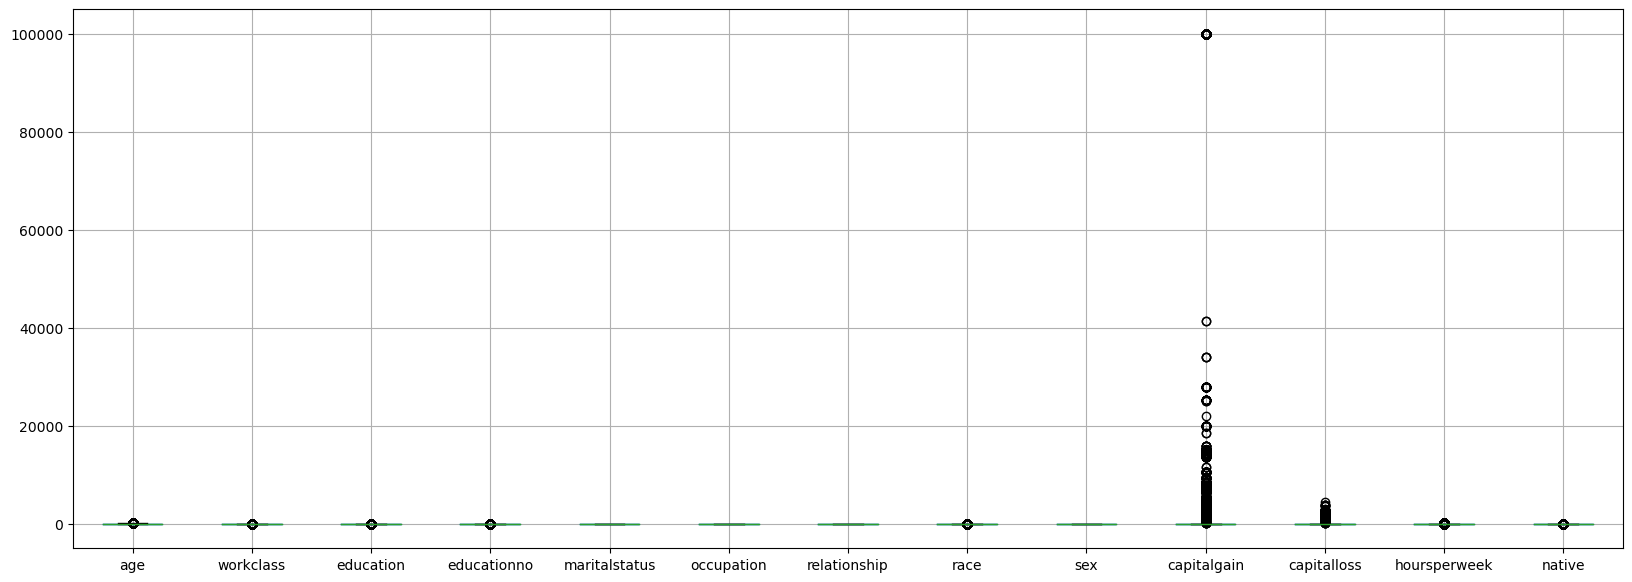

In [84]:
Train.boxplot(figsize=(20,7));

<AxesSubplot:>

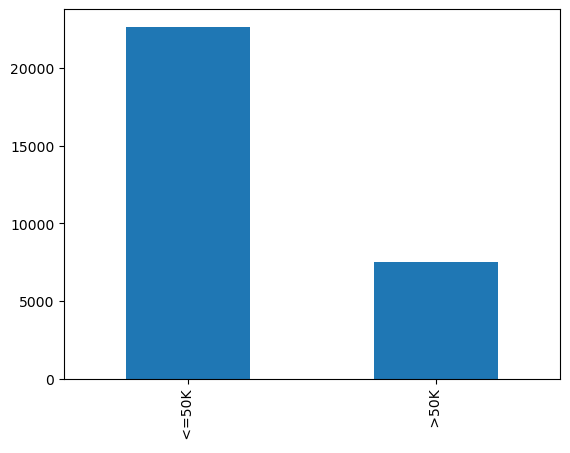

In [85]:
Train.Salary.value_counts().plot(kind='bar')

In [86]:
# correlation analysis

In [87]:
Train_corr=Train.corr()
Train_corr

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
age,1.000000,0.080537,-0.001091,0.043525,-0.276363,-0.005682,-0.246452,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548
workclass,0.080537,1.000000,0.017864,0.037833,-0.034235,0.015572,-0.067414,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598
education,-0.001091,0.017864,1.000000,0.345420,-0.040704,-0.038213,-0.012732,0.011139,-0.027831,0.030582,0.014822,0.059892,0.079715
educationno,0.043525,0.037833,0.345420,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625
maritalstatus,-0.276363,-0.034235,-0.040704,-0.063419,1.000000,0.022655,0.177955,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057
occupation,-0.005682,0.015572,-0.038213,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298
relationship,-0.246452,-0.067414,-0.012732,-0.091935,0.177955,-0.053727,1.000000,-0.117148,-0.584881,-0.058257,-0.063659,-0.257850,-0.010661
race,0.023380,0.044734,0.011139,0.032805,-0.068641,0.000717,-0.117148,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507
sex,0.081972,0.074966,-0.027831,0.006155,-0.119774,0.062316,-0.584881,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063
capitalgain,0.080152,0.035349,0.030582,0.124416,-0.042414,0.022162,-0.058257,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513


<AxesSubplot:>

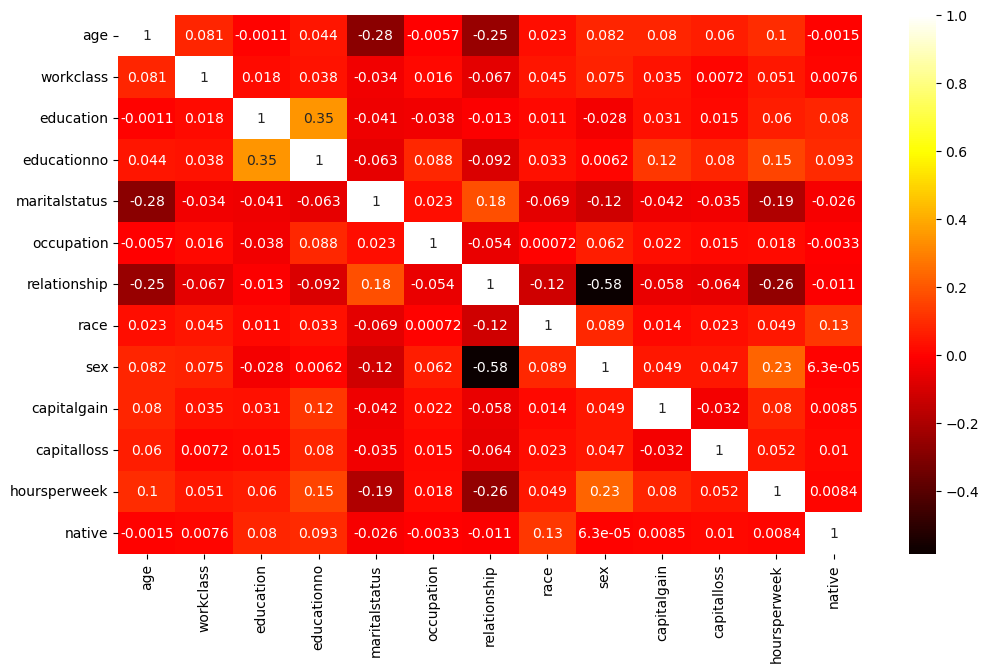

In [88]:
fig=plt.figure(figsize=(12,7))
sns.heatmap(Train_corr,annot=True,cmap='hot')


In [89]:
# checking multicolllinearity

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
x_train=Train.iloc[:,:13]
y_train=Train.Salary

In [92]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['variables']=x_train.columns


In [93]:
vif

,vif,variables
0,9.410029,age
1,6.247954,workclass
2,9.416186,education
3,19.058430,educationno
4,3.980603,maritalstatus
5,3.201805,occupation
6,2.594669,relationship
7,18.341989,race
8,4.551596,sex
9,1.045816,capitalgain


In [94]:
# normalization

In [95]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [96]:
X_train=norm_func(x_train)
X_test=norm_func(Test.iloc[:,:13])
y_test=Test.Salary

In [97]:
# Building the model using support vector method

In [98]:
model=SVC()
model.fit(X_train,y_train)

SVC()

In [ ]:
# Training accuracy

In [104]:
score=model.score(X_train,y_train)

In [105]:
score

0.8445343324160339

In [100]:
y_pred=model.predict(X_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
# Test accuracy

In [103]:
print(np.mean(y_test==y_pred))

0.8432934926958832


In [ ]:
# Randomizedcv Search

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [108]:
R_model=SVC()
param_grid=[{'kernel':['linear','rbf','poly','sigmoid'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
rad_cv=RandomizedSearchCV(R_model,param_grid,verbose=300)
rad_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=0.0001, gamma=0.1, kernel=sigmoid........................
[CV 1/5; 1/10] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.751 total time=  35.1s
[CV 2/5; 1/10] START C=0.0001, gamma=0.1, kernel=sigmoid........................
[CV 2/5; 1/10] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.751 total time=  34.8s
[CV 3/5; 1/10] START C=0.0001, gamma=0.1, kernel=sigmoid........................
[CV 3/5; 1/10] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.751 total time=  34.6s
[CV 4/5; 1/10] START C=0.0001, gamma=0.1, kernel=sigmoid........................
[CV 4/5; 1/10] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.751 total time=  33.5s
[CV 5/5; 1/10] START C=0.0001, gamma=0.1, kernel=sigmoid........................
[CV 5/5; 1/10] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.751 total time=  34.1s
[CV 1/5; 2/10] START C=0.1, gamma=0.5, kernel=poly..............................
[CV 1/5; 2/10

[CV 5/5; 10/10] END C=0.001, gamma=0.5, kernel=linear;, score=0.751 total time=  29.3s


RandomizedSearchCV(estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf', 'poly',
                                                    'sigmoid']}],
                   verbose=300)

In [109]:
rad_cv.best_params_

{'kernel': 'poly', 'gamma': 0.5, 'C': 0.1}

In [ ]:
# Building the model using the hyper parameters

In [111]:
model_1=SVC(kernel='poly',gamma=0.5,C=0.1)
model_1.fit(X_train,y_train)

SVC(C=0.1, gamma=0.5, kernel='poly')

In [113]:
score=model_1.score(X_train,y_train)

In [114]:
score

0.8395278671131594

In [117]:
Y_pred=model_1.predict(X_test)

In [118]:
print(np.mean(Y_pred==y_test))

0.8373173970783533


In [ ]:
# K fold validation

In [119]:
kfold=KFold(n_splits=10)
results=cross_val_score(model_1,X_train,y_train,cv=kfold)

In [122]:
print(results.mean())

0.8374727670521335


In [127]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix=metrics.confusion_matrix(y_test,Y_pred)
confusion_matrix

array([[10715,   645],
       [ 1805,  1895]], dtype=int64)

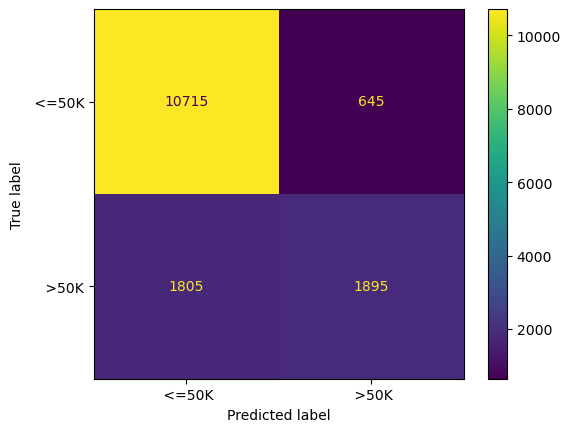

In [130]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=model_1.classes_)
disp.plot()
plt.show()

In [132]:
from sklearn.feature_selection import RFE


In [140]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [141]:
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X_train, y_train)

In [187]:
test.scores_

array([4.28392820e-01, 6.76876876e-01, 7.33488386e+00, 1.68151829e+01,
       1.76543871e+01, 5.82516690e+01, 1.61142239e+02, 1.63704610e+02,
       1.94701587e+02, 2.88977449e+02, 4.59219298e+02, 6.87076546e+02,
       7.41254036e+02])

In [159]:
scores=pd.DataFrame(test.scores_,columns=['Scores'])
scores['features']=X_train.columns
scores

,Scores,features
0,0.428393,age
1,0.676877,workclass
2,7.334884,education
3,16.815183,educationno
4,17.654387,maritalstatus
5,58.251669,occupation
6,161.142239,relationship
7,163.704610,race
8,194.701587,sex
9,288.977449,capitalgain


In [177]:
# Calcualte the Fisher Score (chi2) between each feature and target
fisher_score = chi2(X_train, y_train)
fisher_score

(array([1.94701587e+02, 6.76876876e-01, 1.76543871e+01, 1.61142239e+02,
        1.63704610e+02, 1.68151829e+01, 6.87076546e+02, 7.33488386e+00,
        4.59219298e+02, 7.41254036e+02, 2.88977449e+02, 5.82516690e+01,
        4.28392820e-01]),
 array([2.99323091e-044, 4.10664240e-001, 2.64903534e-005, 6.36924949e-037,
        1.75505879e-037, 4.12023313e-005, 1.93210789e-151, 6.76290491e-003,
        7.10862994e-102, 3.19965954e-163, 8.30543117e-065, 2.30641223e-014,
        5.12778623e-001]))

In [178]:
pvalues=pd.DataFrame(fisher_score).transpose()

In [179]:
pvalues['features']=X_train.columns
pvalues=pvalues.rename({0:'chi score',1:'pvalues'},axis=1)
pvalues

,chi score,pvalues,features
0,194.701587,2.993231e-44,age
1,0.676877,4.106642e-01,workclass
2,17.654387,2.649035e-05,education
3,161.142239,6.369249e-37,educationno
4,163.704610,1.755059e-37,maritalstatus
5,16.815183,4.120233e-05,occupation
6,687.076546,1.932108e-151,relationship
7,7.334884,6.762905e-03,race
8,459.219298,7.108630e-102,sex
9,741.254036,3.199660e-163,capitalgain


<AxesSubplot:xlabel='chi score', ylabel='features'>

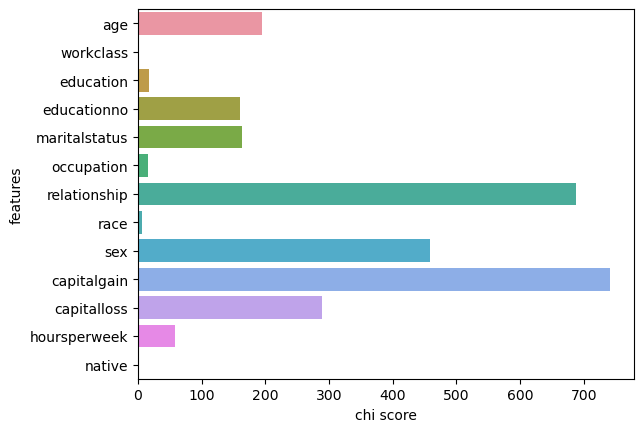

In [185]:
sns.barplot(x=pvalues['chi score'],y=pvalues['features'])

In [ ]:
# since p values and score for native and workclass is p>0.05 and less score they are less significant to target variable

In [189]:
X_train1=X_train.drop(columns=['workclass','native'])
X_test1=X_test.drop(columns=['workclass','native'])

In [193]:
X_train1

,age,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
0,0.301370,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959
1,0.452055,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449
2,0.287671,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959
3,0.493151,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959
4,0.150685,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959
...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551
30157,0.315068,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959
30158,0.561644,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959
30159,0.068493,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878


In [181]:
model_3=SVC(kernel='poly',gamma=0.5,C=0.1)
model_3.fit(X_train1,y_train)

SVC(C=0.1, gamma=0.5, kernel='poly')

In [183]:
score=model_3.score(X_train1,y_train)

In [186]:
score

0.8351513543980638

In [190]:
Y_pred=model_3.predict(X_test1)

In [192]:
print(np.mean(Y_pred==y_test))

0.8337981407702523


In [194]:
kfold=KFold(n_splits=10)
results=cross_val_score(model_1,X_train,y_train,cv=kfold)

In [195]:
print(results.mean())

0.8374727670521335


In [196]:
# even after removing the less significant features,accuracy is same

(array([194.70158721,  17.65438714, 161.14223895, 163.70460988,
         16.81518289, 687.07654615,   7.33488386, 459.21929758,
        741.2540363 , 288.97744933,  58.25166904]),
 array([2.99323091e-044, 2.64903534e-005, 6.36924949e-037, 1.75505879e-037,
        4.12023313e-005, 1.93210789e-151, 6.76290491e-003, 7.10862994e-102,
        3.19965954e-163, 8.30543117e-065, 2.30641223e-014]))

In [198]:
Confusion_Matrix=metrics.confusion_matrix(Y_pred,y_test)
Confusion_Matrix

array([[10719,  1862],
       [  641,  1838]], dtype=int64)

In [199]:
from sklearn.ensemble import BaggingClassifier

In [200]:
model_4 = BaggingClassifier(base_estimator=model_3, n_estimators=31, random_state=314)
model_4.fit(X_train1,y_train)

BaggingClassifier(base_estimator=SVC(C=0.1, gamma=0.5, kernel='poly'),
                  n_estimators=31, random_state=314)

In [201]:
result=model_4.score(X_train1,y_train)

In [202]:
result

0.8352839759954909

In [203]:
Y_pred=model_3.predict(X_test1)

In [206]:
print(np.mean(Y_pred==y_test))

0.8337981407702523
